In [8]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install tensorflow


In [10]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from optuna.visualization import plot_slice
from sklearn.neural_network import MLPClassifier
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [12]:
df=pd.read_csv('indian_liver_patient.csv')

In [13]:
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [14]:
df.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio     Dataset  
count  583.000000                  579.000000  583.000000  
mean     3.141852                    0.947064    1.286449  
std      0.795519                    0.319592    0.452490  
min      0.900000                    0.300000    1.000000  
25%      2.600000                    0.700000    1.000000  
50%      3.100000                    0.930000    1.000000  
75%      3.800000                    1.100000    2.000000  
max      5.500000                    2.800000    2.000000

## #  EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [16]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

In [17]:
def convertdataset(x):
    if x==2:
        return 0
    return 1
df['Dataset'] = df['Dataset'].map(convertdataset)

In [18]:
df.Dataset.value_counts()

Dataset
1    416
0    167
Name: count, dtype: int64

In [19]:
df['Gender'].value_counts()

Gender
Male      441
Female    142
Name: count, dtype: int64

In [20]:
# Categorical Value Handling
def convertgender(x):
    if x== 'Male':
        return 0
    else:
        return 1
df['Gender'] = df['Gender'].map(convertgender)

In [21]:
df = df.drop_duplicates()

In [22]:
df.shape

(570, 11)

<Axes: >

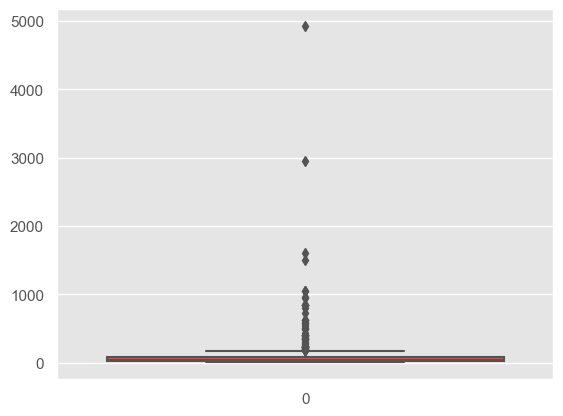

In [23]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [24]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [25]:
df = df[df.Aspartate_Aminotransferase<=3000]

In [26]:
df.shape

(569, 11)

In [27]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [28]:
df = df[df.Aspartate_Aminotransferase<=2500]

In [29]:
df.shape

(568, 11)

In [30]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [31]:
df = df.dropna(how='any')

### Machine Learning Model

In [32]:
y=df.Dataset
X=df.drop('Dataset', axis=1)

In [33]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [34]:
# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols)

In [35]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [36]:
# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution after SMOTE:
Dataset
1    402
0    402
Name: count, dtype: int64


In [37]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

In [38]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 564, dtype: int64

In [39]:
# Data Standardization
train_mean = X_train.mean()
train_std = X_train.std()

X_train = (X_train - train_mean) / train_std

In [40]:
X_train.describe()

Age        Gender  Total_Bilirubin  Direct_Bilirubin  \
count  4.510000e+02  4.510000e+02     4.510000e+02      4.510000e+02   
mean   1.083144e-16  7.877414e-17    -1.969353e-17     -3.938707e-17   
std    1.000000e+00  1.000000e+00     1.000000e+00      1.000000e+00   
min   -2.568370e+00 -5.468521e-01    -4.545818e-01     -4.862972e-01   
25%   -7.747074e-01 -5.468521e-01    -3.928717e-01     -4.516441e-01   
50%    2.934809e-02 -5.468521e-01    -3.620167e-01     -4.169909e-01   
75%    8.952540e-01 -5.468521e-01    -1.151762e-01     -7.045893e-02   
max    2.441515e+00  1.824593e+00     1.105435e+01      6.305729e+00   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count          4.510000e+02              4.510000e+02   
mean          -1.270233e-16              2.757095e-17   
std            1.000000e+00              1.000000e+00   
min           -9.633546e-01             -4.150881e-01   
25%           -4.787490e-01             -3.330804e-01   
50%           -3.259454e-01             -2.573809e-01   
75%            5.169765e-02             -9.967374e-02   
max            7.973471e+00              1.011975e+01   

       Aspartate_Aminotransferase  Total_Protiens       Albumin  \
count                4.510000e+02    4.510000e+02  4.510000e+02   
mean                -3.544836e-17   -1.398241e-16  1.851192e-16   
std                  1.000000e+00    1.000000e+00  1.000000e+00   
min                 -4.880241e-01   -3.301461e+00 -2.789562e+00   
25%                 -4.080816e-01   -6.720731e-01 -7.673117e-01   
50%                 -3.167187e-01    5.327531e-02 -8.967850e-03   
75%                 -7.974627e-02    6.879552e-01  8.125713e-01   
max                  8.585452e+00    2.773332e+00  2.392454e+00   

       Albumin_and_Globulin_Ratio  
count                4.510000e+02  
mean                -7.483543e-17  
std                  1.000000e+00  
min                 -2.079954e+00  
25%                 -7.705468e-01  
50%                 -1.763780e-02  
75%                  5.388602e-01  
max                  5.121785e+00

In [41]:
X_test = (X_test - train_mean) / train_std

In [42]:
X_test.describe()

Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  113.000000  113.000000       113.000000        113.000000   
mean    -0.201633    0.166680        -0.029574         -0.022619   
std      1.019796    1.092491         0.833443          0.911646   
min     -2.382818   -0.546852        -0.423727         -0.486297   
25%     -0.836558   -0.546852        -0.392872         -0.451644   
50%     -0.094353   -0.546852        -0.362017         -0.382338   
75%      0.462301    1.824593        -0.084321         -0.105112   
max      2.750767    1.824593         3.757133          3.914658   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            113.000000                113.000000   
mean               0.166349                 -0.035753   
std                1.288436                  0.912202   
min               -0.627187                 -0.408780   
25%               -0.443822                 -0.326772   
50%               -0.339043                 -0.257381   
75%                0.136831                 -0.087057   
max                6.401777                  7.407188   

       Aspartate_Aminotransferase  Total_Protiens     Albumin  \
count                  113.000000      113.000000  113.000000   
mean                    -0.004175        0.245043    0.249406   
std                      0.926675        0.912073    1.013153   
min                     -0.493734       -3.392130   -2.789562   
25%                     -0.402371       -0.218730   -0.388140   
50%                     -0.316719        0.325281    0.370204   
75%                     -0.025500        0.778624    1.002157   
max                      5.444853        2.864000    3.024408   

       Albumin_and_Globulin_Ratio  
count                  113.000000  
mean                     0.208901  
std                      1.199502  
min                     -1.752602  
25%                     -0.737812  
50%                      0.211508  
75%                      0.866212  
max                      6.103840

In [43]:
# Train the Random Forest model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Predict probabilities
y_rfc_proba = rfc.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
rfc_auc = roc_auc_score(y_test, y_rfc_proba)
print(f'Random Forest: {rfc_auc:.4f}')

Random Forest: 0.7103


In [44]:
# Train the SVC model
svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train, y_train)

# Predict probabilities
y_svc_proba = svc_model.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
svc_auc = roc_auc_score(y_test, y_svc_proba)
print(f'SVC: {svc_auc:.4f}')

SVC: 0.6809


In [45]:
# Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict probabilities
y_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
xgb_auc = roc_auc_score(y_test, y_xgb_proba)
print(f'XGBoost: {xgb_auc:.4f}')

XGBoost: 0.7091


In [46]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['AUC'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Predict probabilities
y_nn_proba = model.predict(X_test).ravel()

# Compute ROC AUC score
nn_auc = roc_auc_score(y_test, y_nn_proba)
print(f'Deep Learning: {nn_auc:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Deep Learning: 0.7226


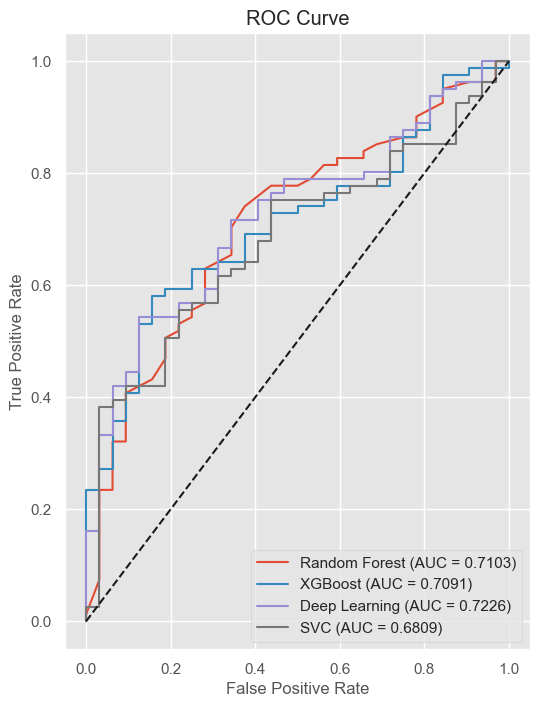

In [47]:
# Plot ROC curves
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_rfc_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_xgb_proba)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_nn_proba)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_svc_proba)

plt.figure(figsize=(6, 8))
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {rfc_auc:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_auc:.4f})')
plt.plot(fpr_nn, tpr_nn, label=f'Deep Learning (AUC = {nn_auc:.4f})')
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {svc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


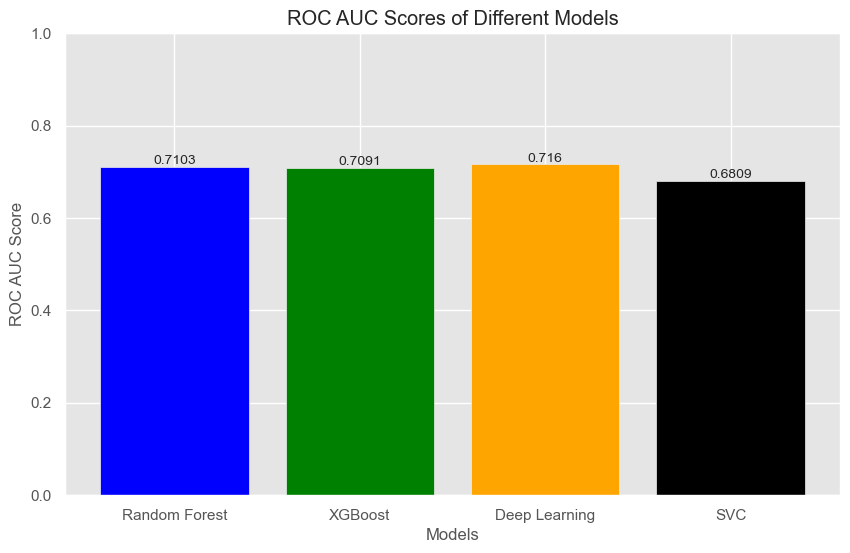

In [48]:
#Computed the ROC AUC scores for the models
rfc_auc = 0.7103  # Replace with actual value
xgb_auc = 0.7091  # Replace with actual value
nn_auc = 0.716  # Replace with actual value
svc_auc = 0.6809 # Replace with actual value

# Model names and their respective AUC scores
model_names = ['Random Forest', 'XGBoost', 'Deep Learning', 'SVC']
auc_scores = [rfc_auc, xgb_auc, nn_auc, svc_auc]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, auc_scores, color=['blue', 'green', 'orange', 'black'])

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Scores of Different Models')
plt.ylim(0, 1)
plt.show()

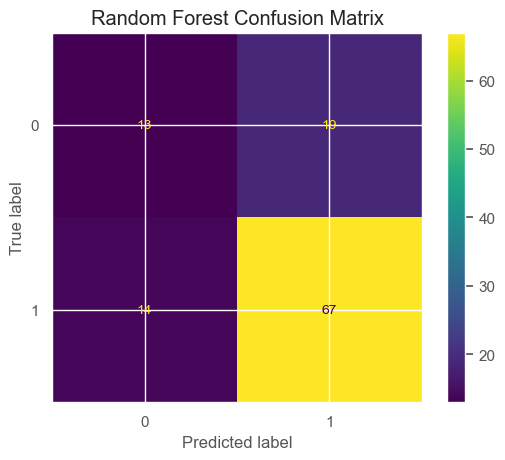

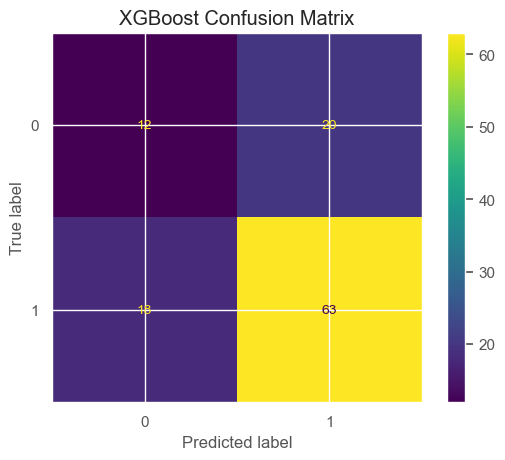

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


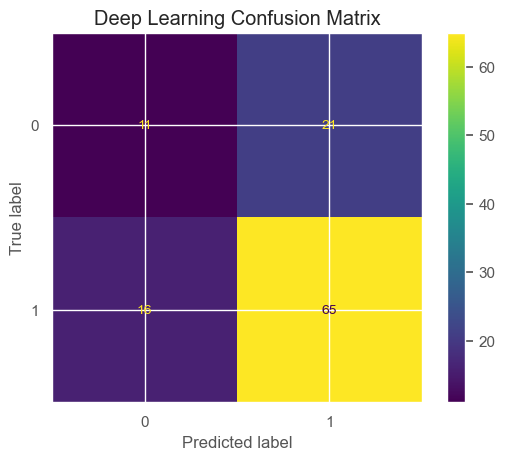

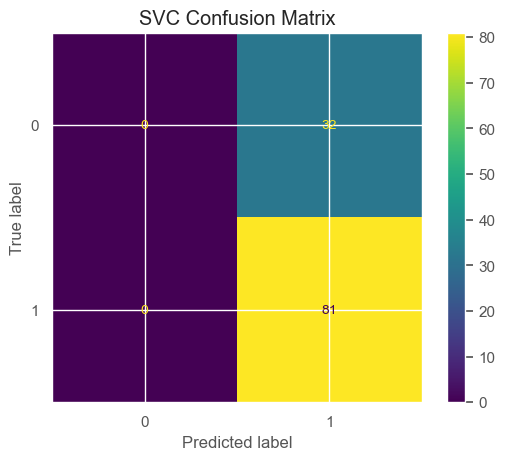

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Random Forest
y_rfc_pred = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_rfc_pred)
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=rfc.classes_)
disp_rfc.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

# XGBoost
y_xgb_pred = xgb_model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_xgb_pred)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()

# Deep Learning
y_nn_pred = (model.predict(X_test) > 0.5).astype("int32").ravel()
cm_nn = confusion_matrix(y_test, y_nn_pred)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=[0, 1])
disp_nn.plot()
plt.title('Deep Learning Confusion Matrix')
plt.show()

# SVC
y_svc_pred = svc_model.predict(X_test)
cm_svc = confusion_matrix(y_test, y_svc_pred)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc_model.classes_)
disp_svc.plot()
plt.title('SVC Confusion Matrix')
plt.show()

In [50]:
# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best score for Random Forest: ", grid_search_rf.best_score_)

y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best score for Random Forest:  0.7161000735835173
              precision    recall  f1-score   support

           0       0.44      0.34      0.39        32
           1       0.76      0.83      0.79        81

    accuracy                           0.69       113
   macro avg       0.60      0.59      0.59       113
weighted avg       0.67      0.69      0.68       113



In [77]:
# SVM Hyperparameter Tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

svm = SVC(random_state=42)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_svm.fit(X_train, y_train)

print("Best parameters for SVM: ", grid_search_svm.best_params_)
print("Best score for SVM: ", grid_search_svm.best_score_)

y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_svm))

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters for SVM:  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best score for SVM:  0.7117586460632818
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [52]:
# XGBoost Hyperparameter Tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost: ", grid_search_xgb.best_params_)
print("Best score for XGBoost: ", grid_search_xgb.best_score_)

y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters for XGBoost:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best score for XGBoost:  0.7184253127299485
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [53]:
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e1)
    kernel = trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else 3
    
    svc = SVC(C=C, gamma=gamma, kernel=kernel, degree=degree, random_state=42)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [54]:
study = optuna.create_study(direction='maximize')

[I 2024-08-07 22:55:11,425] A new study created in memory with name: no-name-59da996b-cc72-49c0-9d38-f70cbbc5dc15


In [55]:
study.optimize(objective, n_trials=20)

[I 2024-08-07 22:55:11,477] Trial 0 finished with value: 0.7168141592920354 and parameters: {'C': 88.23465201421094, 'gamma': 0.0003065331235657136, 'kernel': 'poly', 'degree': 3}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08-07 22:55:11,524] Trial 1 finished with value: 0.7168141592920354 and parameters: {'C': 0.30486239530121323, 'gamma': 0.0347794613461537, 'kernel': 'rbf'}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08-07 22:55:11,558] Trial 2 finished with value: 0.7168141592920354 and parameters: {'C': 0.7499810884581966, 'gamma': 0.0011957619439153327, 'kernel': 'linear'}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08-07 22:55:11,588] Trial 3 finished with value: 0.7168141592920354 and parameters: {'C': 0.8052901053467002, 'gamma': 0.0013124305613826696, 'kernel': 'poly', 'degree': 4}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08-07 22:55:11,619] Trial 4 finished with value: 0.7168141592920354 and parameters: {'C': 2.80922762

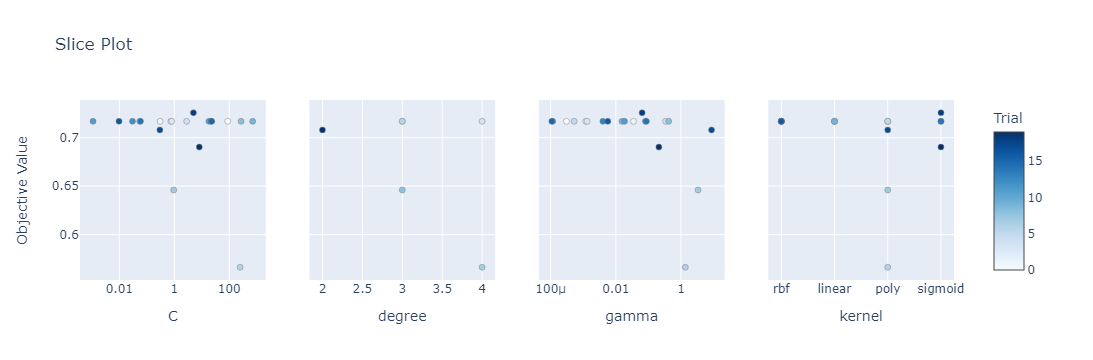

In [56]:
fig = optuna.visualization.plot_slice(study)
fig.show()

In [57]:
# Random Forest Hyperparameter Tuning
def rf_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

[I 2024-08-07 22:56:00,700] A new study created in memory with name: no-name-7e0d8231-44c1-4162-9785-08ab1ab63276
[I 2024-08-07 22:56:02,592] Trial 0 finished with value: 0.7079646017699115 and parameters: {'n_estimators': 863, 'max_depth': 12, 'min_samples_split': 17, 'min_samples_leaf': 15, 'max_features': 'log2'}. Best is trial 0 with value: 0.7079646017699115.
[I 2024-08-07 22:56:02,955] Trial 1 finished with value: 0.7168141592920354 and parameters: {'n_estimators': 185, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7168141592920354.
[I 2024-08-07 22:56:03,317] Trial 2 finished with value: 0.7168141592920354 and parameters: {'n_estimators': 200, 'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 14, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7168141592920354.
[I 2024-08-07 22:56:03,856] Trial 3 finished with value: 0.6991150442477876 and parameters: {'n_estimators': 286, 'max_depth': 7

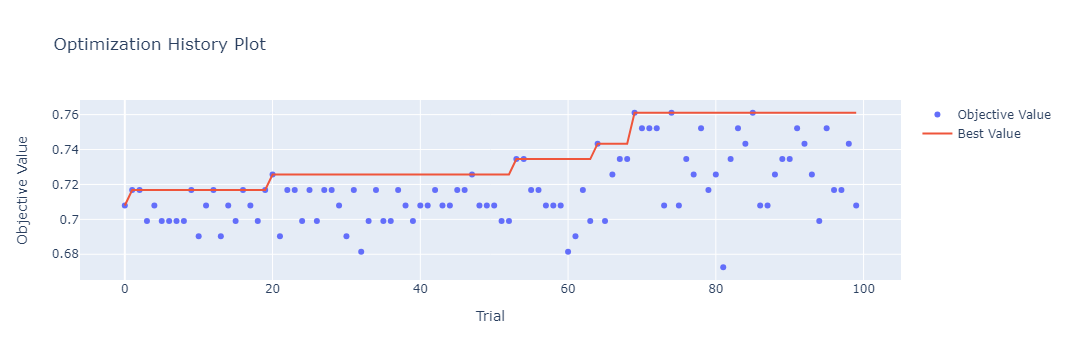

In [58]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(rf_objective, n_trials=100)

fig_rf = plot_optimization_history(study_rf)
fig_rf.show()

In [59]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Setup the grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best score for Random Forest: ", grid_search_rf.best_score_)

# Predict on the test set
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best score for Random Forest:  0.7161000735835173
              precision    recall  f1-score   support

           0       0.44      0.34      0.39        32
           1       0.76      0.83      0.79        81

    accuracy                           0.69       113
   macro avg       0.60      0.59      0.59       113
weighted avg       0.67      0.69      0.68       113



In [60]:
# SVM Hyperparameter Tuning
def objective_svc(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e1)
    kernel = trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else 3
    
    svc = SVC(C=C, gamma=gamma, kernel=kernel, degree=degree, random_state=42)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy


[I 2024-08-07 23:01:14,724] A new study created in memory with name: no-name-e01358c8-e30b-45db-99df-dbb0a861e6b0
[I 2024-08-07 23:01:14,764] Trial 0 finished with value: 0.7168141592920354 and parameters: {'C': 0.0012827731703330568, 'gamma': 0.27369784400184566, 'kernel': 'rbf'}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08-07 23:01:14,791] Trial 1 finished with value: 0.7168141592920354 and parameters: {'C': 0.00813085370551661, 'gamma': 0.001794493054237233, 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08-07 23:01:14,815] Trial 2 finished with value: 0.7168141592920354 and parameters: {'C': 0.4182463763510144, 'gamma': 0.2990642214549197, 'kernel': 'linear'}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08-07 23:01:14,841] Trial 3 finished with value: 0.7168141592920354 and parameters: {'C': 0.035213417953785, 'gamma': 0.0003154043507654284, 'kernel': 'poly', 'degree': 3}. Best is trial 0 with value: 0.7168141592920354.
[I 2

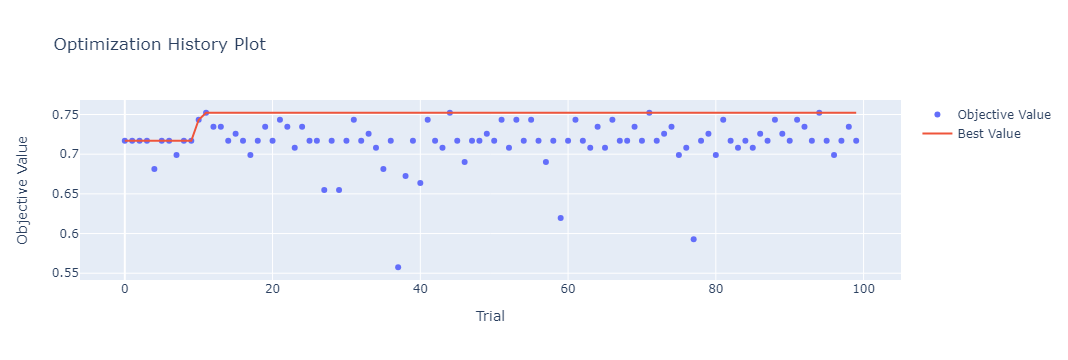

In [61]:
study_svc = optuna.create_study(direction='maximize')
study_svc.optimize(objective_svc, n_trials=100)

fig_svc = plot_optimization_history(study_svc)
fig_svc.show()

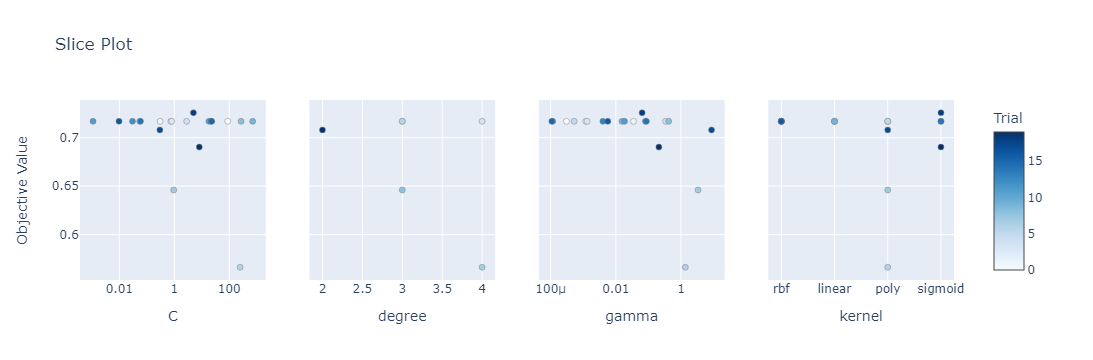

In [62]:
fig = optuna.visualization.plot_slice(study)
fig.show()

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}
Best ROC AUC score:  0.7082650016794768
Best Model ROC AUC: 0.7508


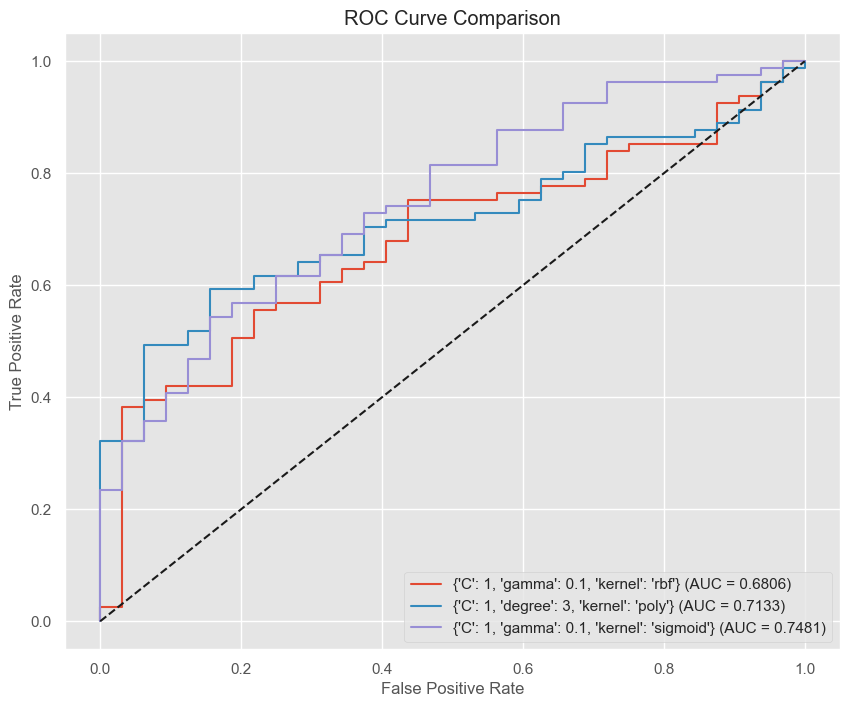

In [63]:
# Define the hyperparameter grid
param_grid = [
    {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
    {'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'kernel': ['poly']},
    {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['sigmoid']}
]

# Perform Grid Search
grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC AUC score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict probabilities for the best model
y_best_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC AUC score for the best model
best_auc = roc_auc_score(y_test, y_best_proba)
print(f'Best Model ROC AUC: {best_auc:.4f}')

# Plot ROC curves for three different hyperparameter sets
hyperparams = [
    {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
    {'C': 1, 'degree': 3, 'kernel': 'poly'},
    {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
]

plt.figure(figsize=(10, 8))

for params in hyperparams:
    model = SVC(probability=True, random_state=42, **params)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{params} (AUC = {auc:.4f})")

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [64]:
# Define the objective function for Optuna
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e1)
    kernel = trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else 3
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    
    svc = SVC(C=C, gamma=gamma, kernel=kernel, degree=degree, probability=True, random_state=42)
    svc.fit(X_train, y_train)
    y_pred = svc.predict_proba(X_test)[:, 1]
    accuracy = roc_auc_score(y_test, y_pred)
    
    return accuracy

[I 2024-08-07 23:01:59,597] A new study created in memory with name: no-name-760bae68-af7c-43c6-bfda-a24f8368f259
[I 2024-08-07 23:01:59,695] Trial 0 finished with value: 0.6658950617283951 and parameters: {'C': 0.36600651095905046, 'gamma': 0.2193160486016471, 'kernel': 'rbf', 'learning_rate': 0.0006644017792486399}. Best is trial 0 with value: 0.6658950617283951.
[I 2024-08-07 23:01:59,797] Trial 1 finished with value: 0.5686728395061729 and parameters: {'C': 0.0128630563404427, 'gamma': 1.3631966739551409, 'kernel': 'sigmoid', 'learning_rate': 3.851129558335737e-05}. Best is trial 0 with value: 0.6658950617283951.
[I 2024-08-07 23:01:59,980] Trial 2 finished with value: 0.6500771604938271 and parameters: {'C': 238.5481834587437, 'gamma': 0.06131437092942741, 'kernel': 'rbf', 'learning_rate': 0.09873270510438442}. Best is trial 0 with value: 0.6658950617283951.
[I 2024-08-07 23:02:00,553] Trial 3 finished with value: 0.675925925925926 and parameters: {'C': 2.8126586935989404, 'gamma'

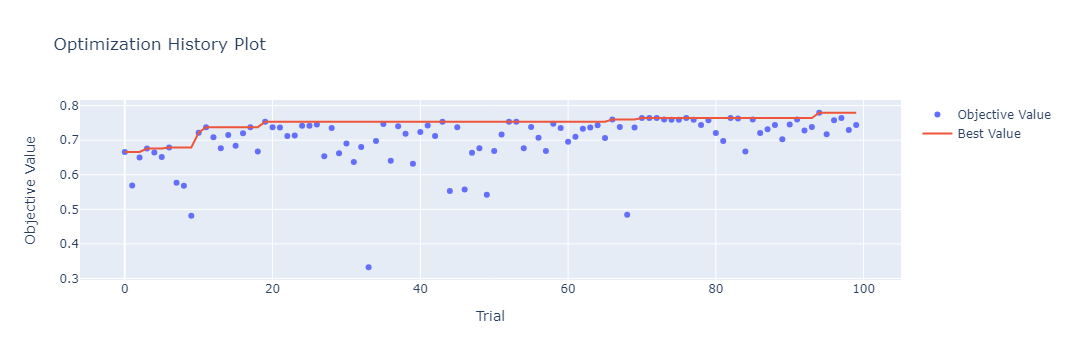

In [65]:
# Run Optuna optimization for Study 1
study_1 = optuna.create_study(direction='maximize')
study_1.optimize(objective, n_trials=100)

# Visualize the results for Study 1
import optuna.visualization as vis

fig_1 = vis.plot_optimization_history(study_1)
fig_1.show()

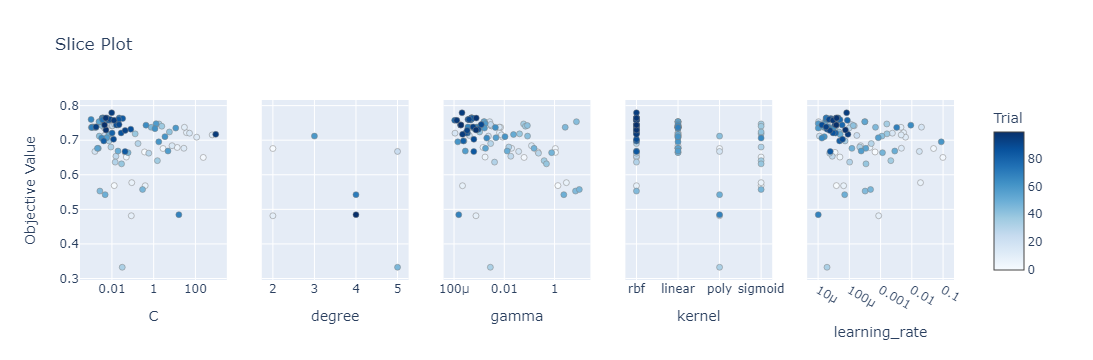

In [66]:
fig = optuna.visualization.plot_slice(study_1)
fig.show()

[I 2024-08-07 23:03:41,981] A new study created in memory with name: no-name-2d53e8bf-4fcc-4de7-823f-3d1030430e2c
[I 2024-08-07 23:03:42,119] Trial 0 finished with value: 0.7160493827160495 and parameters: {'C': 271.25229921191203, 'gamma': 0.00040037391382972867, 'kernel': 'rbf', 'learning_rate': 0.02977034471238497}. Best is trial 0 with value: 0.7160493827160495.
[I 2024-08-07 23:03:42,219] Trial 1 finished with value: 0.6589506172839507 and parameters: {'C': 2.541036196799394, 'gamma': 0.000535931195748283, 'kernel': 'rbf', 'learning_rate': 0.0030663336001858707}. Best is trial 0 with value: 0.7160493827160495.
[I 2024-08-07 23:03:42,274] Trial 2 finished with value: 0.7083333333333333 and parameters: {'C': 0.048016132656597016, 'gamma': 0.4820841886173864, 'kernel': 'linear', 'learning_rate': 0.0038362528889959225}. Best is trial 0 with value: 0.7160493827160495.
[I 2024-08-07 23:03:43,427] Trial 3 finished with value: 0.6836419753086419 and parameters: {'C': 5.664421346829183, 'g

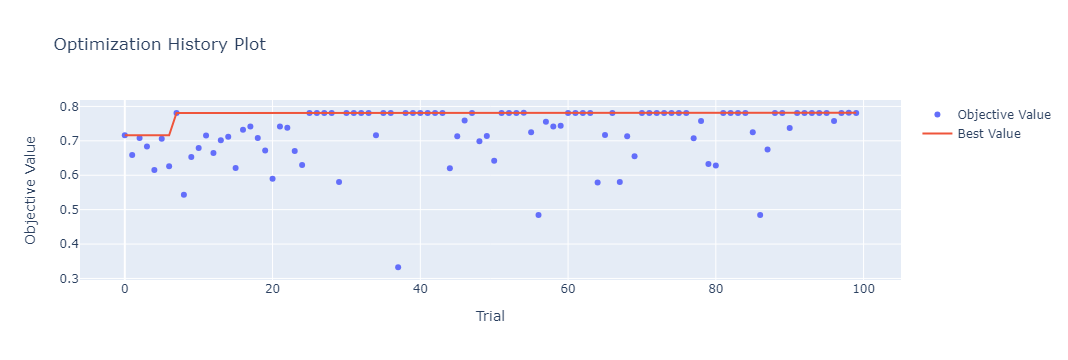

In [67]:
# Run Optuna optimization for Study 2
study_2 = optuna.create_study(direction='maximize')
study_2.optimize(objective, n_trials=100)

# Visualize the results for Study 2
fig_2 = vis.plot_optimization_history(study_2)
fig_2.show()

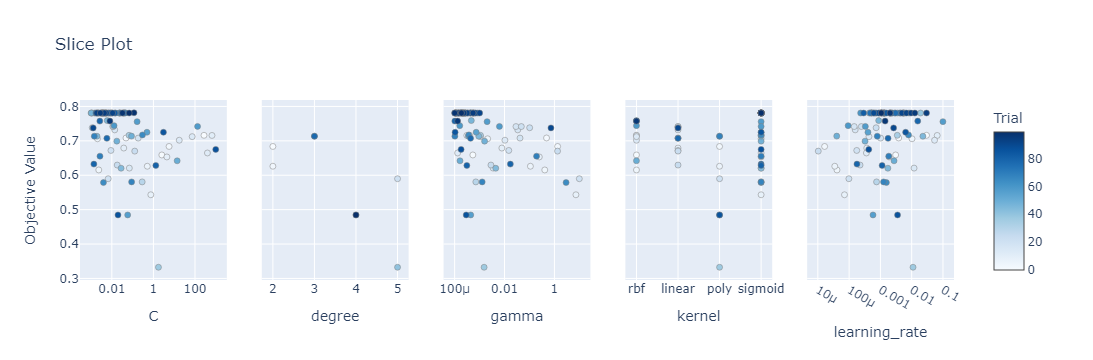

In [68]:
fig = optuna.visualization.plot_slice(study_2)
fig.show()

[I 2024-08-07 23:03:52,524] A new study created in memory with name: no-name-ec373fd2-c535-4715-b255-1c473078f814
[I 2024-08-07 23:03:52,617] Trial 0 finished with value: 0.744212962962963 and parameters: {'C': 2.236148398158642, 'gamma': 0.060502488066648465, 'kernel': 'sigmoid', 'learning_rate': 9.870937216365107e-05}. Best is trial 0 with value: 0.744212962962963.
[I 2024-08-07 23:03:52,680] Trial 1 finished with value: 0.7133487654320988 and parameters: {'C': 0.1424903122091407, 'gamma': 0.00028528371190770255, 'kernel': 'poly', 'degree': 3, 'learning_rate': 0.0008732811310636193}. Best is trial 0 with value: 0.744212962962963.
[I 2024-08-07 23:03:52,774] Trial 2 finished with value: 0.6604938271604939 and parameters: {'C': 0.2743807333406832, 'gamma': 0.24409150254850479, 'kernel': 'rbf', 'learning_rate': 2.1323742574747154e-05}. Best is trial 0 with value: 0.744212962962963.
[I 2024-08-07 23:03:53,134] Trial 3 finished with value: 0.7098765432098766 and parameters: {'C': 1.959079

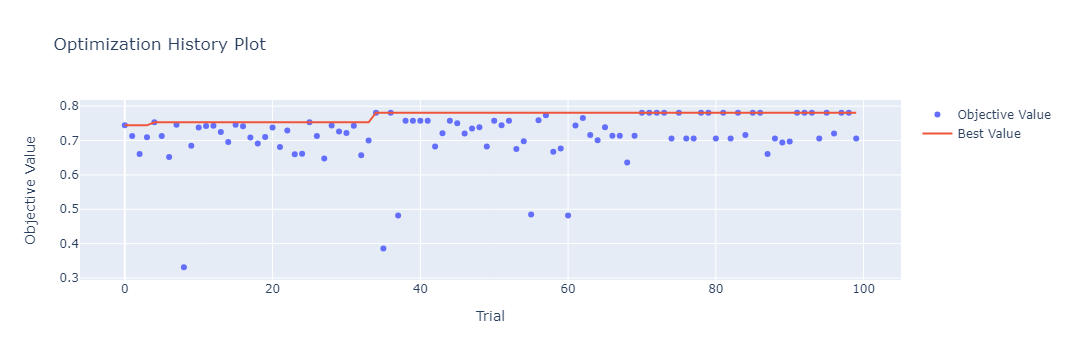

In [69]:
# Run Optuna optimization for Study 3
study_3 = optuna.create_study(direction='maximize')
study_3.optimize(objective, n_trials=100)

# Visualize the results for Study 3
fig_3 = vis.plot_optimization_history(study_3)
fig_3.show()

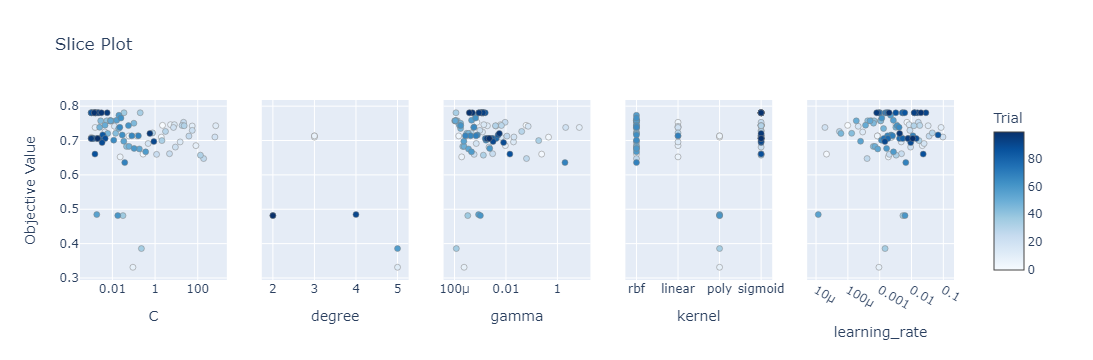

In [70]:
fig = optuna.visualization.plot_slice(study_3)
fig.show()

In [71]:
# XGBoost Hyperparameter Tuning
def objective_xgb(trial):
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.2, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.2, 1.0),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'random_state': 42
    }
    
    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

[I 2024-08-07 23:04:01,076] A new study created in memory with name: no-name-d278cce1-f1fc-4dbb-8dcc-251d305a1583
[I 2024-08-07 23:04:01,332] Trial 0 finished with value: 0.7168141592920354 and parameters: {'booster': 'gblinear', 'lambda': 0.04567122949524361, 'alpha': 1.1803948356048163e-07, 'colsample_bytree': 0.6302187985865993, 'subsample': 0.5567524785213857, 'learning_rate': 3.6195793351399723e-08, 'n_estimators': 754, 'max_depth': 2}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08-07 23:04:01,442] Trial 1 finished with value: 0.7168141592920354 and parameters: {'booster': 'gblinear', 'lambda': 9.875508371346094e-08, 'alpha': 1.931354336393971e-07, 'colsample_bytree': 0.2954975119714051, 'subsample': 0.2801882132451554, 'learning_rate': 0.005163725915837212, 'n_estimators': 277, 'max_depth': 4}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08-07 23:04:03,229] Trial 2 finished with value: 0.7168141592920354 and parameters: {'booster': 'dart', 'lambda': 4.109

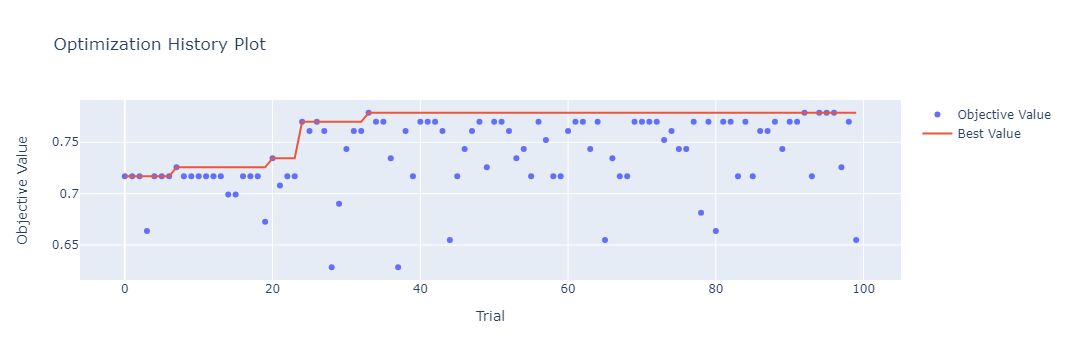

In [72]:
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100)

fig_xgb = plot_optimization_history(study_xgb)
fig_xgb.show()

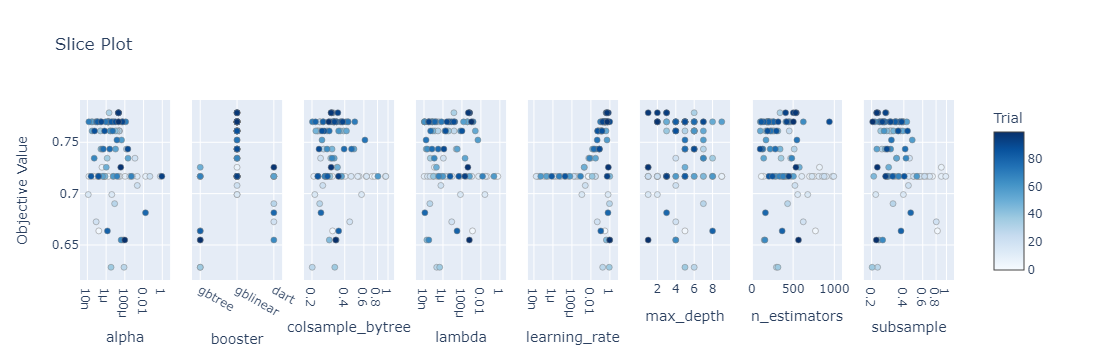

In [73]:
fig = optuna.visualization.plot_slice(study_xgb)
fig.show()

In [78]:
# Define the objective function for Optuna
def objective_xgb(trial):
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.2, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.2, 1.0),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'random_state': 42
    }
    
    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [79]:
# Run Optuna optimization for three separate studies
study_xgb_1 = optuna.create_study(direction='maximize')
study_xgb_1.optimize(objective_xgb, n_trials=50)

study_xgb_2 = optuna.create_study(direction='maximize')
study_xgb_2.optimize(objective_xgb, n_trials=50)

study_xgb_3 = optuna.create_study(direction='maximize')
study_xgb_3.optimize(objective_xgb, n_trials=50)

[I 2024-08-07 23:18:50,251] A new study created in memory with name: no-name-ad24e6a1-c086-4dca-bc91-57fded3f6380
[I 2024-08-07 23:18:50,403] Trial 0 finished with value: 0.7168141592920354 and parameters: {'booster': 'gbtree', 'lambda': 4.366723773104754e-08, 'alpha': 0.6332800189533213, 'colsample_bytree': 0.9455067797339506, 'subsample': 0.28832912654609777, 'learning_rate': 0.0012678101469425795, 'n_estimators': 156, 'max_depth': 5}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08-07 23:18:50,525] Trial 1 finished with value: 0.7168141592920354 and parameters: {'booster': 'gbtree', 'lambda': 0.330544619529741, 'alpha': 0.00018302330833579785, 'colsample_bytree': 0.3415181676773831, 'subsample': 0.48354001986579614, 'learning_rate': 2.7438366358656798e-05, 'n_estimators': 126, 'max_depth': 6}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08-07 23:18:50,700] Trial 2 finished with value: 0.7168141592920354 and parameters: {'booster': 'gblinear', 'lambda': 0.77191

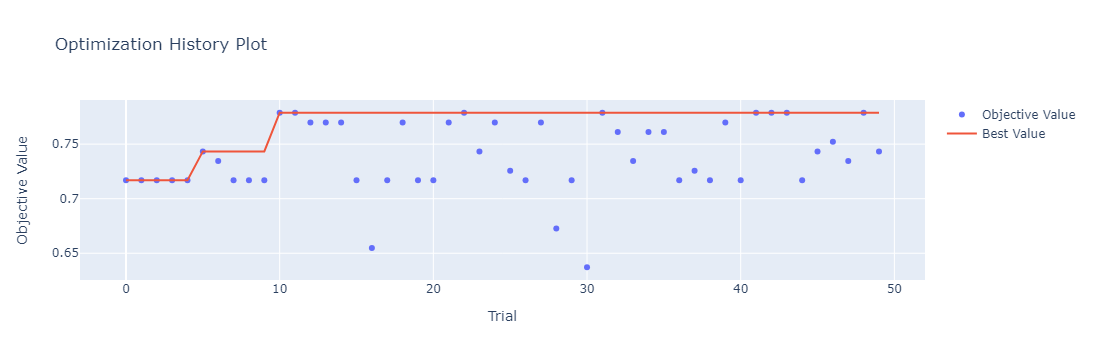

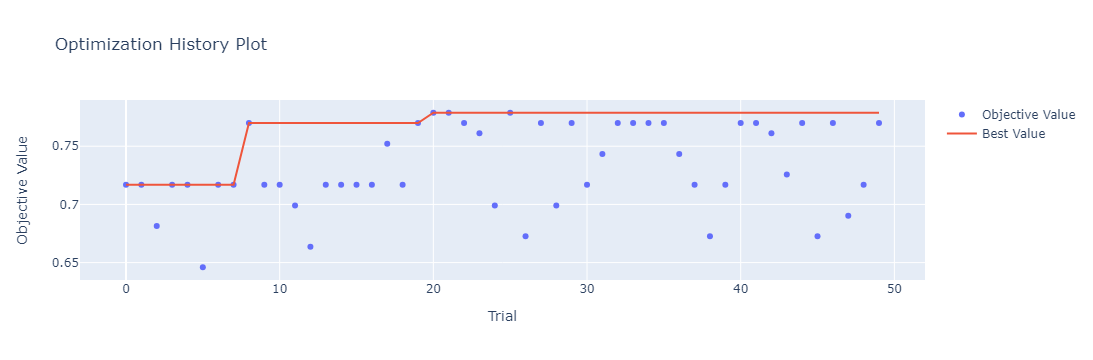

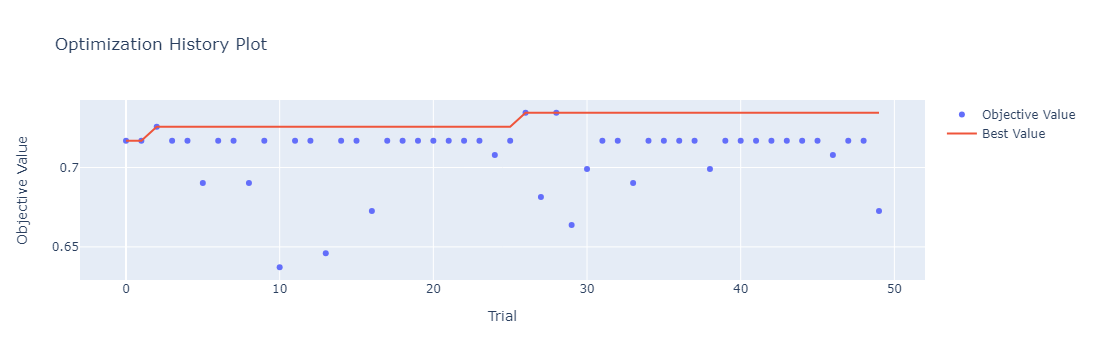

In [80]:
# Visualize the results
import optuna.visualization as vis

fig_xgb_1 = vis.plot_optimization_history(study_xgb_1)
fig_xgb_1.show()

fig_xgb_2 = vis.plot_optimization_history(study_xgb_2)
fig_xgb_2.show()

fig_xgb_3 = vis.plot_optimization_history(study_xgb_3)
fig_xgb_3.show()


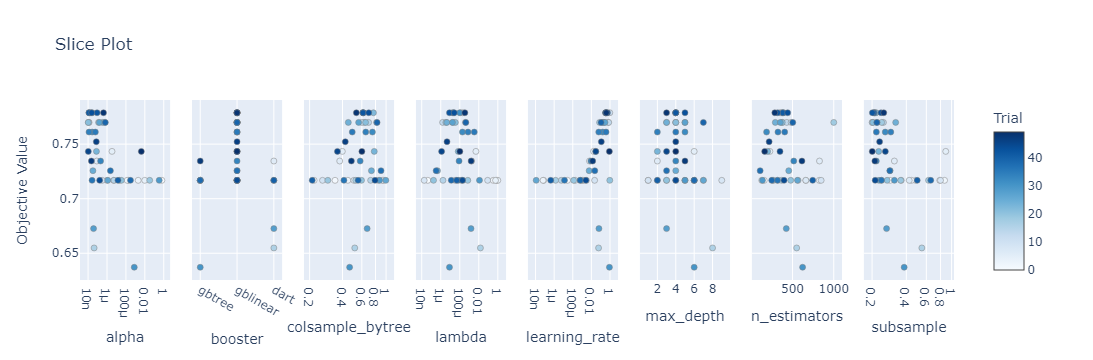

In [81]:
fig = optuna.visualization.plot_slice(study_xgb_1)
fig.show()

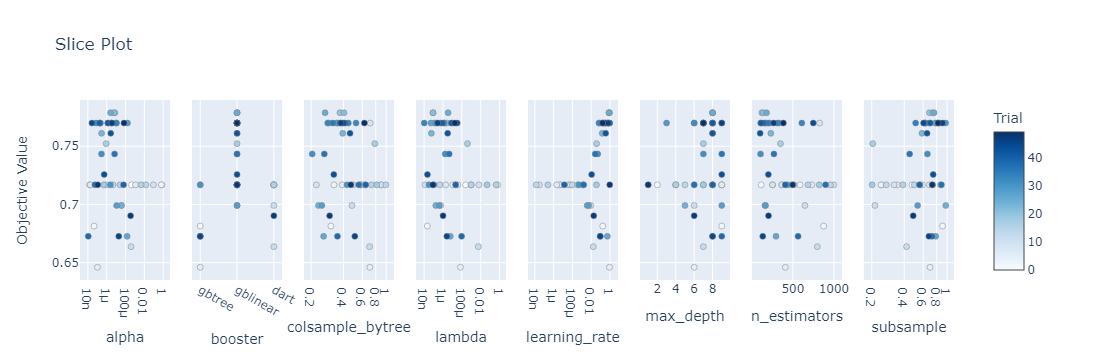

In [82]:
fig = optuna.visualization.plot_slice(study_xgb_2)
fig.show()

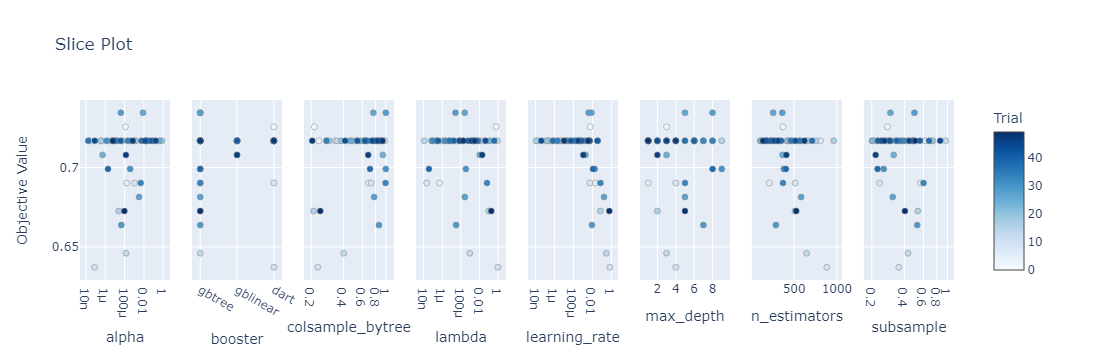

In [83]:
fig = optuna.visualization.plot_slice(study_xgb_3)
fig.show()

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def objective_dl(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units1', 32, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(trial.suggest_uniform('dropout1', 0.0, 0.5)))
    model.add(Dense(trial.suggest_int('units2', 32, 512), activation='relu'))
    model.add(Dropout(trial.suggest_uniform('dropout2', 0.0, 0.5)))
    model.add(Dense(1, activation='sigmoid'))
    
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=trial.suggest_int('epochs', 10, 100), batch_size=trial.suggest_int('batch_size', 16, 128), verbose=0)
    
    score = model.evaluate(X_test, y_test, verbose=0)
    accuracy = score[1]
    
    return accuracy


[I 2024-08-07 23:08:00,882] A new study created in memory with name: no-name-d8557131-b929-438d-9be8-a1aad6a3966c
[I 2024-08-07 23:08:05,371] Trial 0 finished with value: 0.7345132827758789 and parameters: {'units1': 398, 'dropout1': 0.10053965408294985, 'units2': 436, 'dropout2': 0.436854982413809, 'learning_rate': 0.0009645751876694422, 'epochs': 40, 'batch_size': 88}. Best is trial 0 with value: 0.7345132827758789.
[I 2024-08-07 23:08:11,211] Trial 1 finished with value: 0.752212405204773 and parameters: {'units1': 163, 'dropout1': 0.429090875263371, 'units2': 353, 'dropout2': 0.13431428754204705, 'learning_rate': 8.362800970196789e-05, 'epochs': 80, 'batch_size': 90}. Best is trial 1 with value: 0.752212405204773.
[I 2024-08-07 23:08:13,937] Trial 2 finished with value: 0.7168141603469849 and parameters: {'units1': 488, 'dropout1': 0.33081974264444475, 'units2': 393, 'dropout2': 0.3698110742055159, 'learning_rate': 1.0360922387402688e-05, 'epochs': 12, 'batch_size': 62}. Best is tr

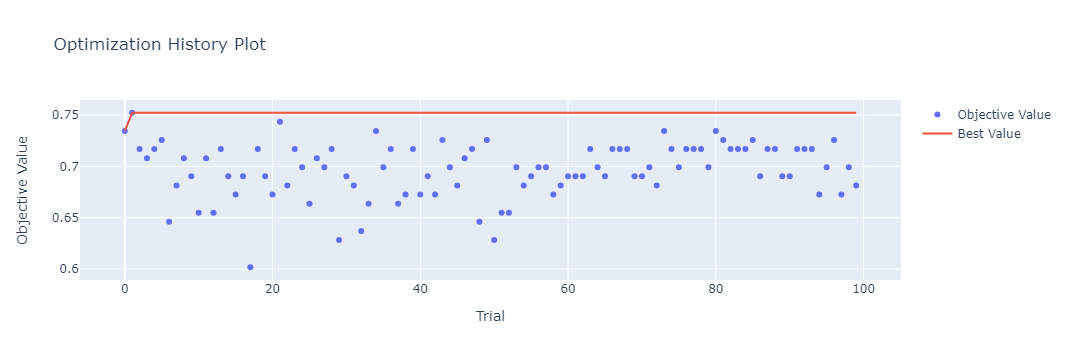

In [75]:
study_dl = optuna.create_study(direction='maximize')
study_dl.optimize(objective_dl, n_trials=100)

fig_dl = plot_optimization_history(study_dl)
fig_dl.show()

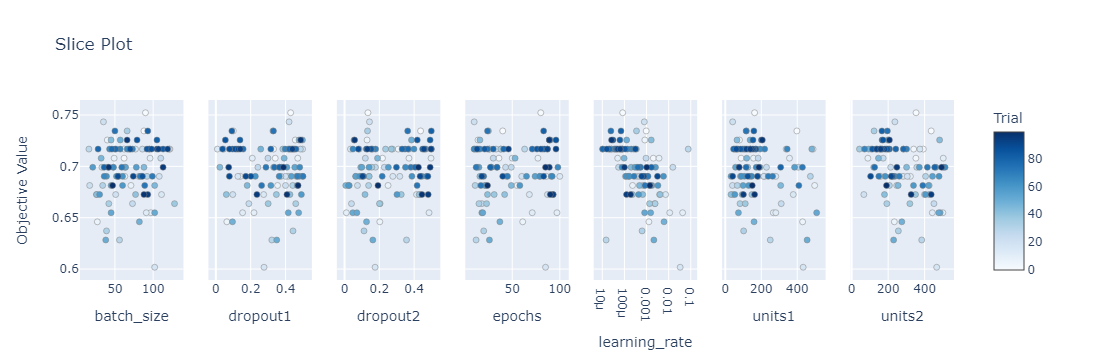

In [76]:
fig = optuna.visualization.plot_slice(study_dl)
fig.show()

In [84]:
def objective_dl(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units1', 32, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(trial.suggest_uniform('dropout1', 0.0, 0.5)))
    model.add(Dense(trial.suggest_int('units2', 32, 512), activation='relu'))
    model.add(Dropout(trial.suggest_uniform('dropout2', 0.0, 0.5)))
    model.add(Dense(1, activation='sigmoid'))
    
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=trial.suggest_int('epochs', 10, 100), batch_size=trial.suggest_int('batch_size', 16, 128), verbose=0)
    
    score = model.evaluate(X_test, y_test, verbose=0)
    accuracy = score[1]
    
    return accuracy

In [85]:
# Run Optuna optimization for three separate studies
study_dl_1 = optuna.create_study(direction='maximize')
study_dl_1.optimize(objective_dl, n_trials=50)

study_dl_2 = optuna.create_study(direction='maximize')
study_dl_2.optimize(objective_dl, n_trials=50)

study_dl_3 = optuna.create_study(direction='maximize')
study_dl_3.optimize(objective_dl, n_trials=50)


[I 2024-08-07 23:54:48,600] A new study created in memory with name: no-name-63bfd438-15fd-4f6e-ad76-04c9b475d947
[I 2024-08-07 23:54:53,426] Trial 0 finished with value: 0.6814159154891968 and parameters: {'units1': 50, 'dropout1': 0.1390426334186497, 'units2': 283, 'dropout2': 0.15710588544002463, 'learning_rate': 0.027842110286613483, 'epochs': 53, 'batch_size': 93}. Best is trial 0 with value: 0.6814159154891968.
[I 2024-08-07 23:54:57,151] Trial 1 finished with value: 0.6725663542747498 and parameters: {'units1': 302, 'dropout1': 0.30508205358854856, 'units2': 159, 'dropout2': 0.01363752102058019, 'learning_rate': 0.019185836845659592, 'epochs': 22, 'batch_size': 78}. Best is trial 0 with value: 0.6814159154891968.
[I 2024-08-07 23:55:02,784] Trial 2 finished with value: 0.6637167930603027 and parameters: {'units1': 500, 'dropout1': 0.31975884144561045, 'units2': 433, 'dropout2': 0.07785109303741339, 'learning_rate': 0.03112615675674157, 'epochs': 39, 'batch_size': 116}. Best is t

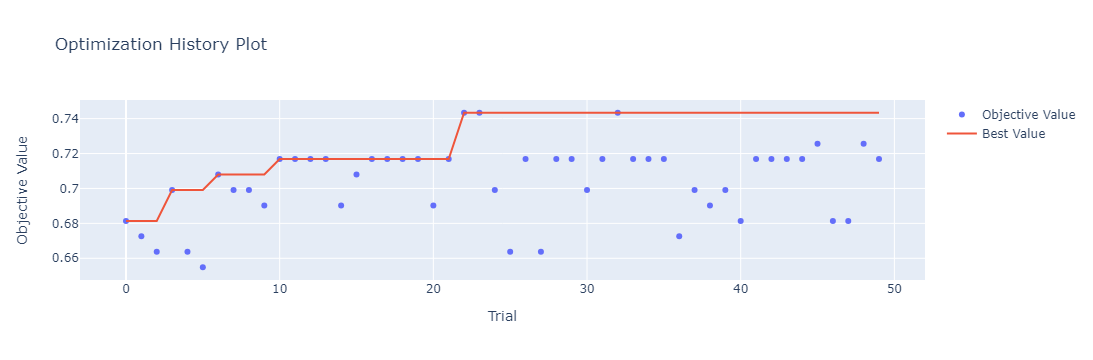

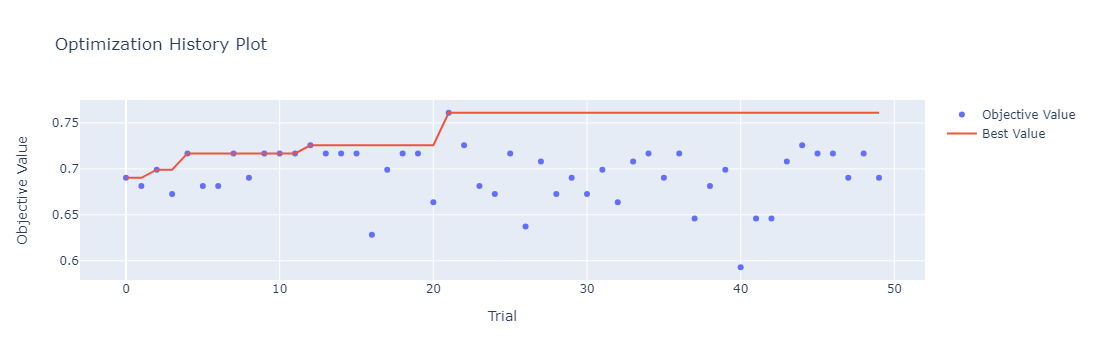

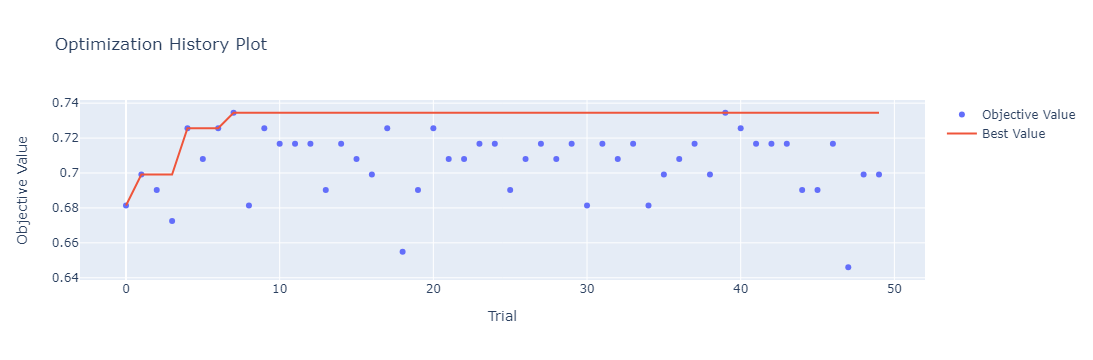

In [86]:
# Visualize the results
import optuna.visualization as vis

fig_dl_1 = vis.plot_optimization_history(study_dl_1)
fig_dl_1.show()

fig_dl_2 = vis.plot_optimization_history(study_dl_2)
fig_dl_2.show()

fig_dl_3 = vis.plot_optimization_history(study_dl_3)
fig_dl_3.show()


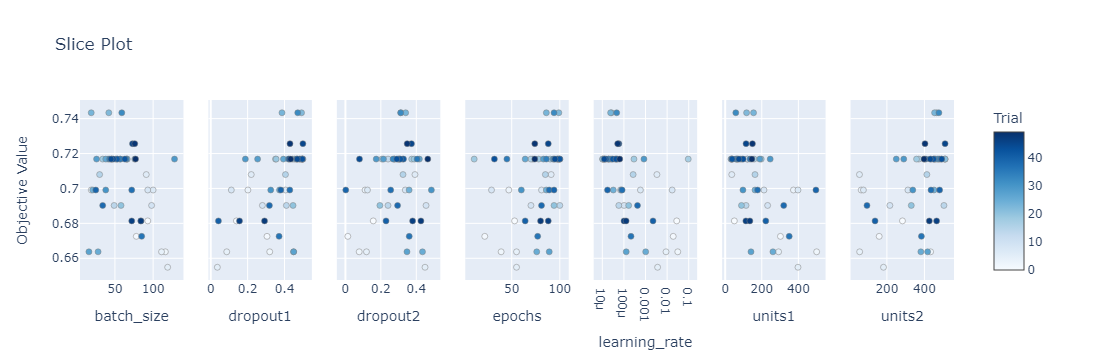

In [87]:
fig = optuna.visualization.plot_slice(study_dl_1)
fig.show()

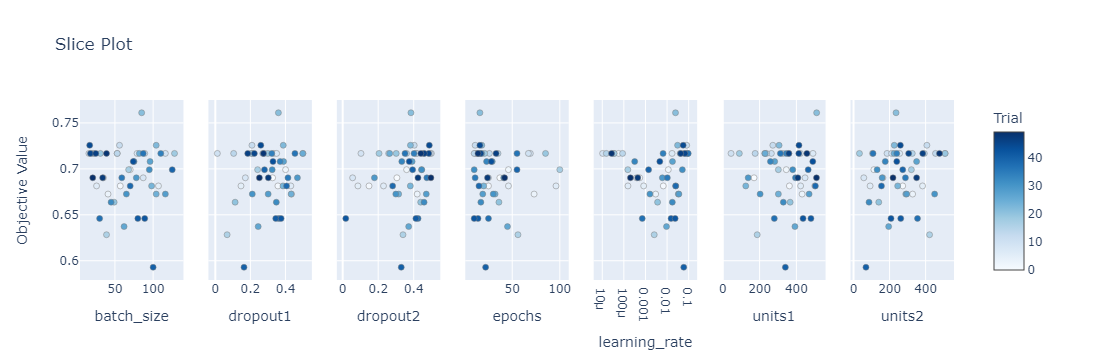

In [88]:
fig = optuna.visualization.plot_slice(study_dl_2)
fig.show()

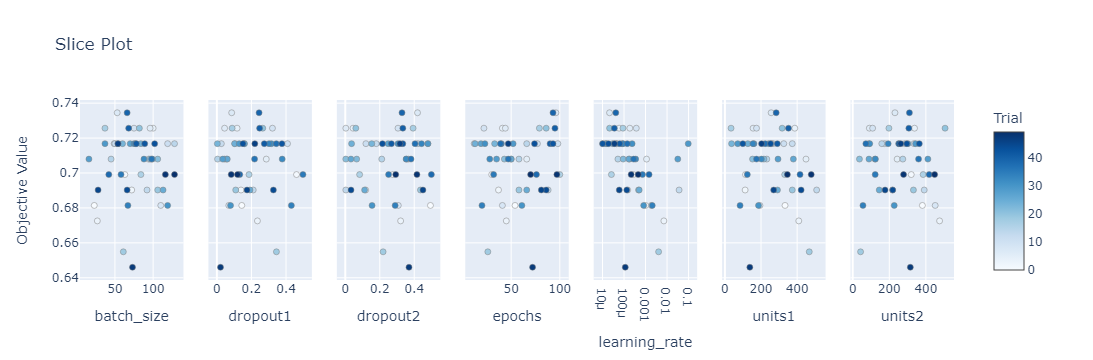

In [89]:
fig = optuna.visualization.plot_slice(study_dl_3)
fig.show()

In [96]:
# Define the objective function for Optuna
def rf_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        criterion=criterion,
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [97]:
# Run Optuna optimization for three separate studies
study_rf_1 = optuna.create_study(direction='maximize')
study_rf_1.optimize(rf_objective, n_trials=50)

study_rf_2 = optuna.create_study(direction='maximize')
study_rf_2.optimize(rf_objective, n_trials=50)

study_rf_3 = optuna.create_study(direction='maximize')
study_rf_3.optimize(rf_objective, n_trials=50)


[I 2024-08-08 00:17:35,299] A new study created in memory with name: no-name-0b225c8f-96a2-4f54-a618-2933a0bd614d
[I 2024-08-08 00:17:36,558] Trial 0 finished with value: 0.7168141592920354 and parameters: {'n_estimators': 855, 'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08-08 00:17:37,589] Trial 1 finished with value: 0.6991150442477876 and parameters: {'n_estimators': 691, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'auto', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08-08 00:17:38,397] Trial 2 finished with value: 0.6902654867256637 and parameters: {'n_estimators': 571, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.7168141592920354.
[I 2024-08

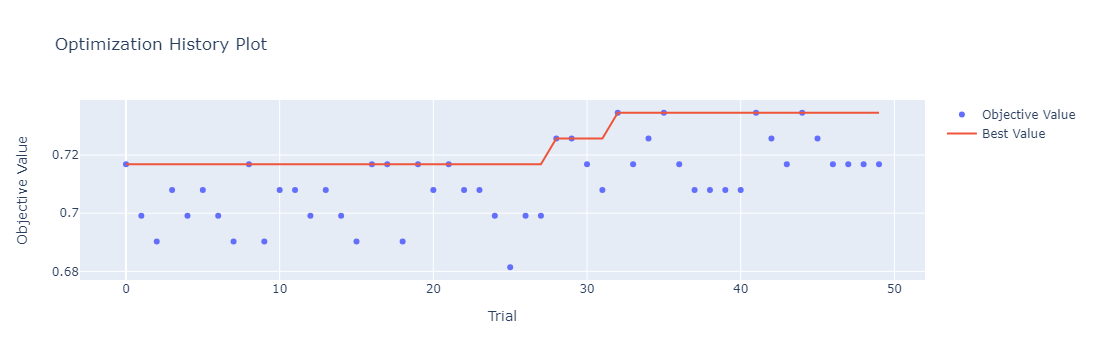

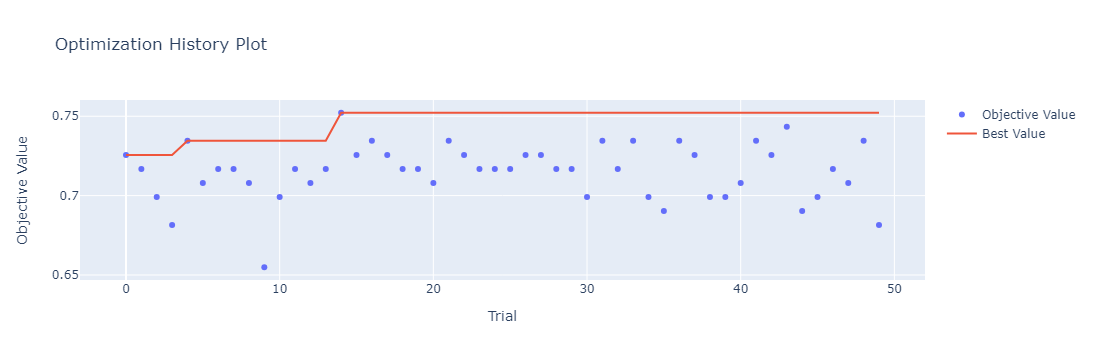

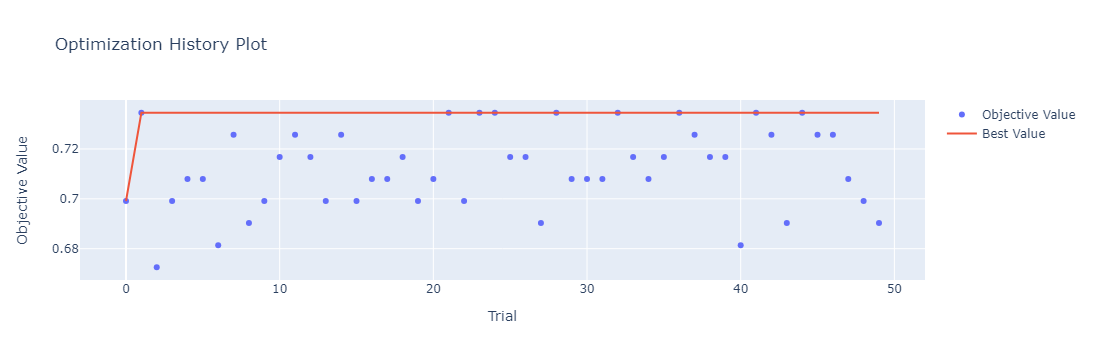

In [101]:
# Visualize the results
import optuna.visualization as vis

fig_rf_1 = vis.plot_optimization_history(study_rf_1)
fig_rf_1.show()

fig_rf_2 = vis.plot_optimization_history(study_rf_2)
fig_rf_2.show()

fig_rf_3 = vis.plot_optimization_history(study_rf_3)
fig_rf_3.show()


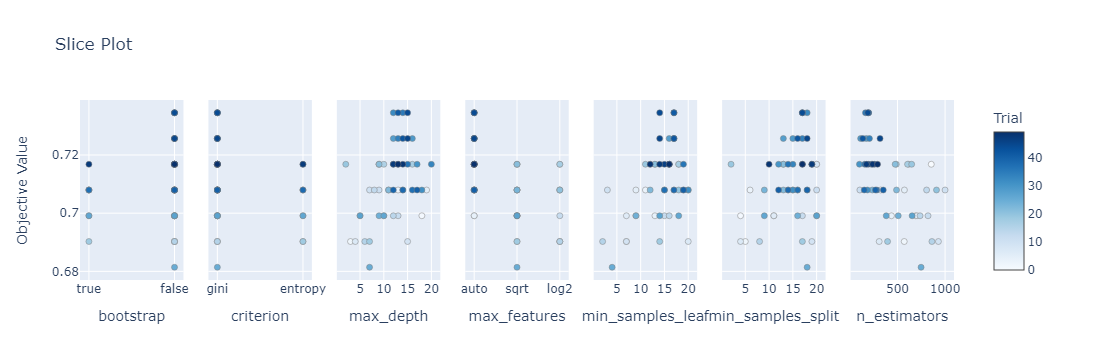

In [98]:
fig = optuna.visualization.plot_slice(study_rf_1)
fig.show()

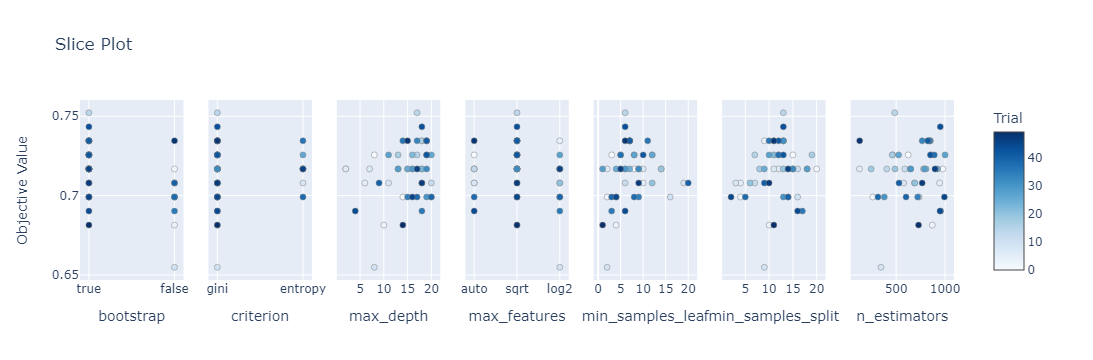

In [99]:
fig = optuna.visualization.plot_slice(study_rf_2)
fig.show()

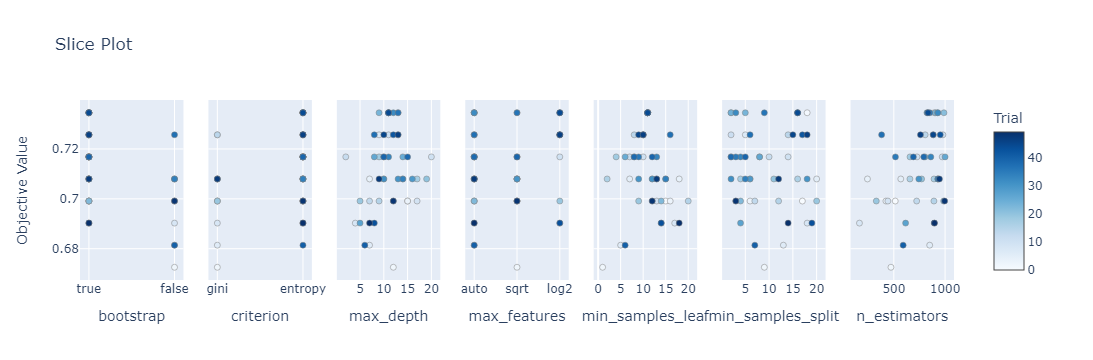

In [100]:
fig = optuna.visualization.plot_slice(study_rf_3)
fig.show()

In [102]:
# Define the objective function for Optuna
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e1)
    kernel = trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else 3
    
    svc = SVC(C=C, gamma=gamma, kernel=kernel, degree=degree, probability=True, random_state=42)
    svc.fit(X_train, y_train)
    y_pred = svc.predict_proba(X_test)[:, 1]
    accuracy = roc_auc_score(y_test, y_pred)
    
    return accuracy

In [103]:
# Run Optuna optimization for three separate studies
study_svc_1 = optuna.create_study(direction='maximize')
study_svc_1.optimize(objective, n_trials=50)

study_svc_2 = optuna.create_study(direction='maximize')
study_svc_2.optimize(objective, n_trials=50)

study_svc_3 = optuna.create_study(direction='maximize')
study_svc_3.optimize(objective, n_trials=50)


[I 2024-08-08 00:27:01,332] A new study created in memory with name: no-name-0262a37e-c0cb-4a20-88b2-0550b942d7ee
[I 2024-08-08 00:27:01,374] Trial 0 finished with value: 0.6435185185185185 and parameters: {'C': 0.06249403231319832, 'gamma': 0.19985441811029644, 'kernel': 'linear'}. Best is trial 0 with value: 0.6435185185185185.
[I 2024-08-08 00:27:01,431] Trial 1 finished with value: 0.6685956790123457 and parameters: {'C': 8.912303715821679, 'gamma': 0.2056969891257024, 'kernel': 'sigmoid'}. Best is trial 1 with value: 0.6685956790123457.
[I 2024-08-08 00:27:01,502] Trial 2 finished with value: 0.7264660493827161 and parameters: {'C': 8.890641871506958, 'gamma': 0.35659930673686413, 'kernel': 'linear'}. Best is trial 2 with value: 0.7264660493827161.
[I 2024-08-08 00:27:01,550] Trial 3 finished with value: 0.6331018518518519 and parameters: {'C': 0.004206436179879617, 'gamma': 0.18031039982237151, 'kernel': 'poly', 'degree': 2}. Best is trial 2 with value: 0.7264660493827161.
[I 202

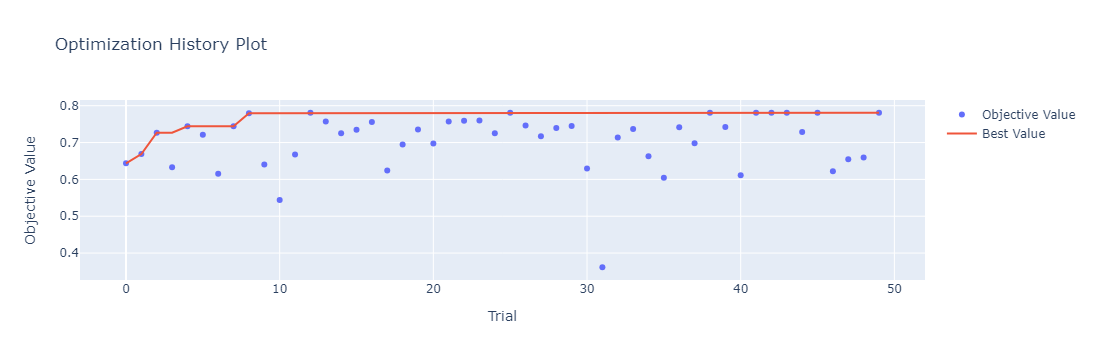

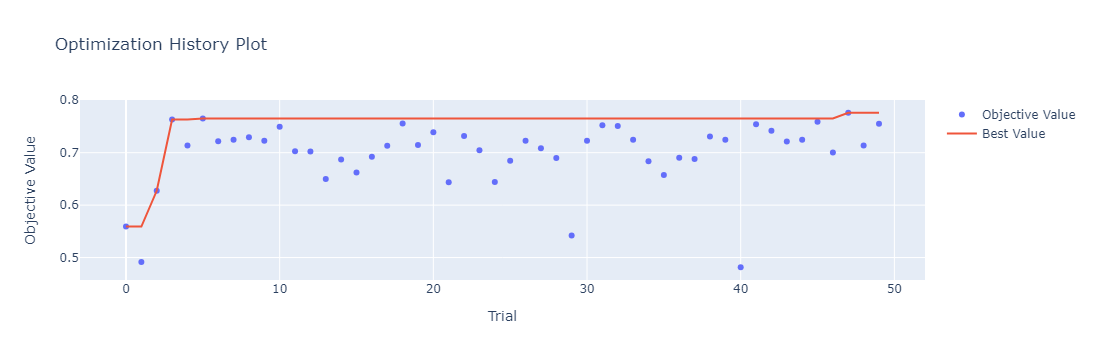

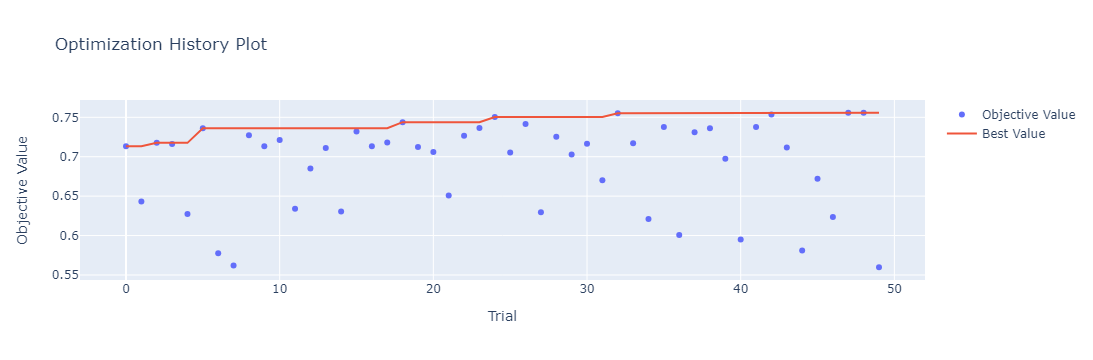

In [104]:
# Visualize the results
import optuna.visualization as vis

fig_svc_1 = vis.plot_optimization_history(study_svc_1)
fig_svc_1.show()

fig_svc_2 = vis.plot_optimization_history(study_svc_2)
fig_svc_2.show()

fig_svc_3 = vis.plot_optimization_history(study_svc_3)
fig_svc_3.show()

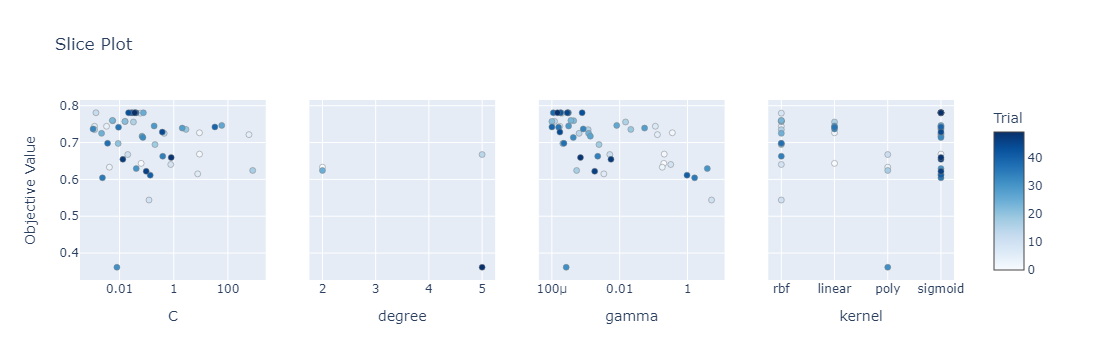

In [105]:
fig = optuna.visualization.plot_slice(study_svc_1)
fig.show()

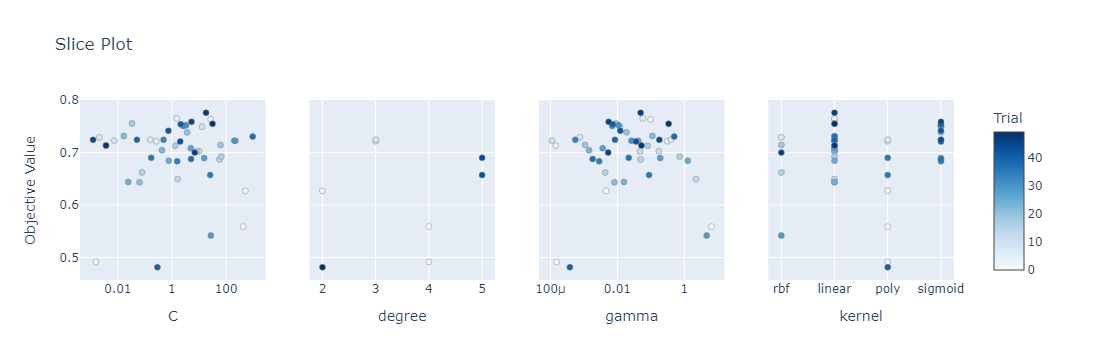

In [106]:
fig = optuna.visualization.plot_slice(study_svc_2)
fig.show()

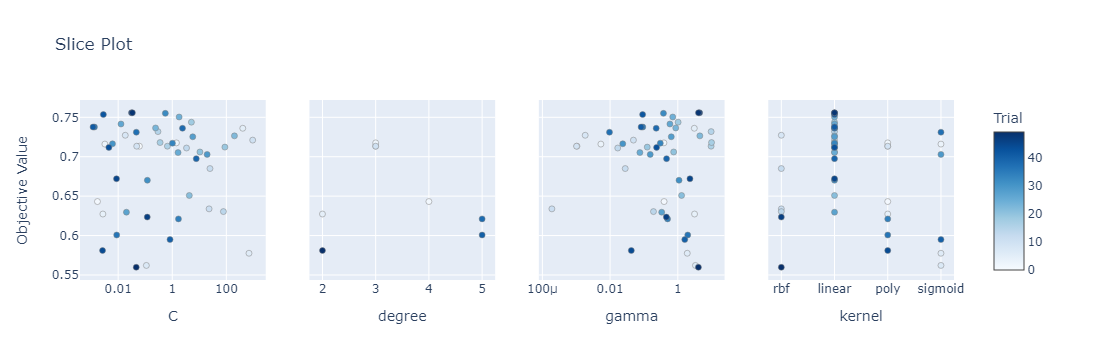

In [107]:
fig = optuna.visualization.plot_slice(study_svc_3)
fig.show()